In [2]:
from IPython.display import Image

## Homework

In this homework, we'll take the ride duration prediction model
that we deployed in batch mode in homework 4 and improve the 
reliability of our code with unit and integration tests. 

You'll find the starter code in this directory.

## Q1. Refactoring

Before we can start covering our code with tests, we need to 
refactor it. We'll start by getting rid of all the global variables. 

* Let's create a function `main` with two parameters: `year` and
`month`.
* Move all the code (except `read_data`) inside `main`
* Make `categorical` a parameter for `read_data` and pass it inside `main`

Now we need to create the "main" block from which we'll invoke
the main function. How does the `if` statement that we use for
this looks like? 


Hint: after refactoring, check that the code still works. Just run it e.g. for March 2023 and see if it finishes successfully. 

To make it easier to run it, you can write results to your local
filesystem. E.g. here:

```python
output_file = f'taxi_type=yellow_year={year:04d}_month={month:02d}.parquet'
```


new code for batch.py

```python
#!/usr/bin/env python
# coding: utf-8

import warnings
import sys
import pickle
import pandas as pd
import click

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


def generate_output_file_path(year, month):
 return f'./output/yellow_tripdata_{year:04d}-{month:02d}.parquet'


def read_data(filename, categorical):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')

    return df, categorical

@click.command()
@click.option(
    '--year',
    type=int,
    required=True,
    help='Year of the trip data'
)
@click.option(
    '--month',
    type=int,
    required=True,
    help='Month of the trip data'
)
def main(year, month):
    with open('./description_homework/model.bin', 'rb') as f_in:
        dv, lr = pickle.load(f_in)

    input_file = f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year:04d}-{month:02d}.parquet'
    df, categorical = read_data(input_file, categorical = ['PULocationID', 'DOLocationID'])

    df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')

    dicts = df[categorical].to_dict(orient='records')
    X_val = dv.transform(dicts)
    y_pred = lr.predict(X_val)

    print('predicted mean duration:', y_pred.mean())


    df_result = pd.DataFrame()
    df_result['ride_id'] = df['ride_id']
    df_result['predicted_duration'] = y_pred

    output_file = generate_output_file_path(year, month)
    df_result.to_parquet(output_file, engine='pyarrow', index=False)


if __name__ == '__main__':
    main()

```

In [7]:
!mkdir -p output

In [17]:
! python batch.py --year 2023 --month 4

predicted mean duration: 14.292282936862449


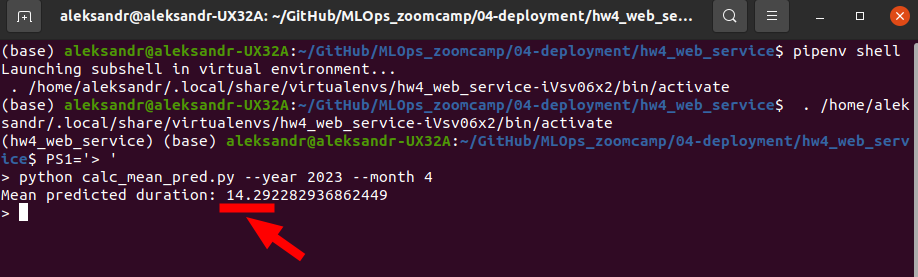

In [20]:
# check answer with answer in hw4 Q5
Image(filename='../04-deployment/screenshots/screenshot_Q5_hw4.png')

In [18]:
# lets check existing output file
! ls ./output -la

итого 44424
drwxrwxr-x 2 aleksandr aleksandr     4096 июл  1 11:47 .
drwxrwxr-x 6 aleksandr aleksandr     4096 июл  1 11:41 ..
-rw-rw-r-- 1 aleksandr aleksandr 23129111 июл  1 11:16 yellow_tripdata_2023-03.parquet
-rw-rw-r-- 1 aleksandr aleksandr 22340573 июл  1 11:47 yellow_tripdata_2023-04.parquet


## ***Answer for Q1:==*** 
```python
if __name__ == '__main__':
```

## Q2. Installing pytest

Now we need to install `pytest`:

```bash
pipenv install --dev pytest
```

Next, create a folder `tests` and create two files. One will be
the file with tests. We can name it `test_batch.py`. 

What should be the other file? 

Hint: to be able to test `batch.py`, we need to be able to
import it. Without this other file, we won't be able to do it.

## ***Answer for Q2:==*** 


## ***Answer for Q3:==*** 14.2

## ***Answer for Q4:==*** `project_folder/dashboards`